In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px
%pip install missingno
import missingno as msno

In [2]:
df1 = pd.read_csv('train.csv')
a1 = df1.copy()


In [3]:
a1.shape

(45528, 19)

In [4]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [5]:
a1[a1.isna().any(axis=1)]


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
8,CST_133768,Ashutosh,40,F,NaN,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
21,CST_151332,James,36,F,N,Y,NaN,253922.42,433.0,Unknown,2.0,0.0,51044.13,60924.47,19,651.0,0,0,0
40,CST_156606,Taylor,47,F,NaN,Y,0.0,229370.35,352.0,Sales staff,2.0,0.0,35347.36,27213.73,87,733.0,0,0,0
114,CST_143524,Herbert,51,F,N,Y,0.0,128675.13,2855.0,Unknown,2.0,NaN,12097.89,25834.20,76,890.0,0,0,0
119,CST_110661,Caroline Valetkevitch,45,M,NaN,Y,0.0,213866.59,2272.0,Core staff,2.0,0.0,22836.78,71050.18,21,802.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45336,CST_136199,Grant,26,F,N,Y,NaN,220105.96,3979.0,Sales staff,NaN,0.0,26035.06,75625.81,40,892.0,0,0,0
45355,CST_113630,Huw Jones,23,M,Y,Y,0.0,232431.74,365248.0,Unknown,2.0,0.0,NaN,42315.63,41,746.0,0,0,0
45371,CST_150539,Stempel,54,F,Y,Y,2.0,82964.66,NaN,Cleaning staff,4.0,1.0,39510.18,27861.75,4,947.0,0,0,0
45381,CST_127280,Yackley,34,F,N,N,NaN,142275.80,1365.0,Sales staff,3.0,1.0,43073.65,41267.76,30,696.0,0,0,0


In [6]:
# Dropping useless columns
a1 = a1.drop(columns=['customer_id',	'name'	])

In [7]:
# Check for duplicate rows
a1.duplicated().sum()

0

In [8]:
a1.dtypes

age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
credit_card_default          int64
dtype: object

In [9]:
# Separating numerical and categorical columns.
num_cols = a1.columns[[0,4,5,6,8,10,11,12,13]].tolist()
cat_cols = [col for col in a1.columns.tolist() if col not in num_cols]

In [10]:
num_cols

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score']

In [11]:
cat_cols

['gender',
 'owns_car',
 'owns_house',
 'occupation_type',
 'migrant_worker',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [12]:
a1[num_cols].describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45433.000000,4.552800e+04,45528.00000,45520.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,31796.965311,4.354842e+04,52.23502,782.791257
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,17269.727234,1.487847e+05,29.37691,100.619746
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,2237.470000,4.003140e+03,0.00000,500.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,19231.140000,2.397381e+04,27.00000,704.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,29081.650000,3.568804e+04,54.00000,786.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,40561.150000,5.343576e+04,78.00000,867.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,328112.860000,3.112997e+07,99.00000,949.000000


# Observations:
1. 14 crore annual income seems unreal at first, need to dig more.
2. No. of days employed is 365252 which is nearly 1000 years that is impossible.
3. credit limit of 3 crore is sus.


In [13]:
# Summary of categorical Columns

(
    a1
    .assign(**{
        col: a1[col].astype("object")
        for col in cat_cols
    })
    .describe(include='object')
    .T
)

,count,unique,top,freq
gender,45528,3,F,29957
owns_car,44981,2,N,29743
owns_house,45528,2,Y,31642
occupation_type,45528,19,Unknown,14299
migrant_worker,45441.0,2.0,0.0,37302.0
prev_defaults,45528,3,0,43060
default_in_last_6months,45528,2,0,43227
credit_card_default,45528,2,0,41831


In [14]:
a1['gender'] = a1['gender'].replace('XNA', 'M')

In [15]:
a1['gender'].value_counts()

gender
F    29957
M    15571
Name: count, dtype: int64

Missing Value Analysis

In [16]:
a1.isna().sum()

age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [17]:
# No. of rows with missing values
missing_rows = (
    a1.isnull().any(axis=1).sum()
)
missing_rows


2019

In [18]:
# Percentage of rows with missing values.
(missing_rows/a1.shape[0])*100

4.434633632050606

<Axes: >

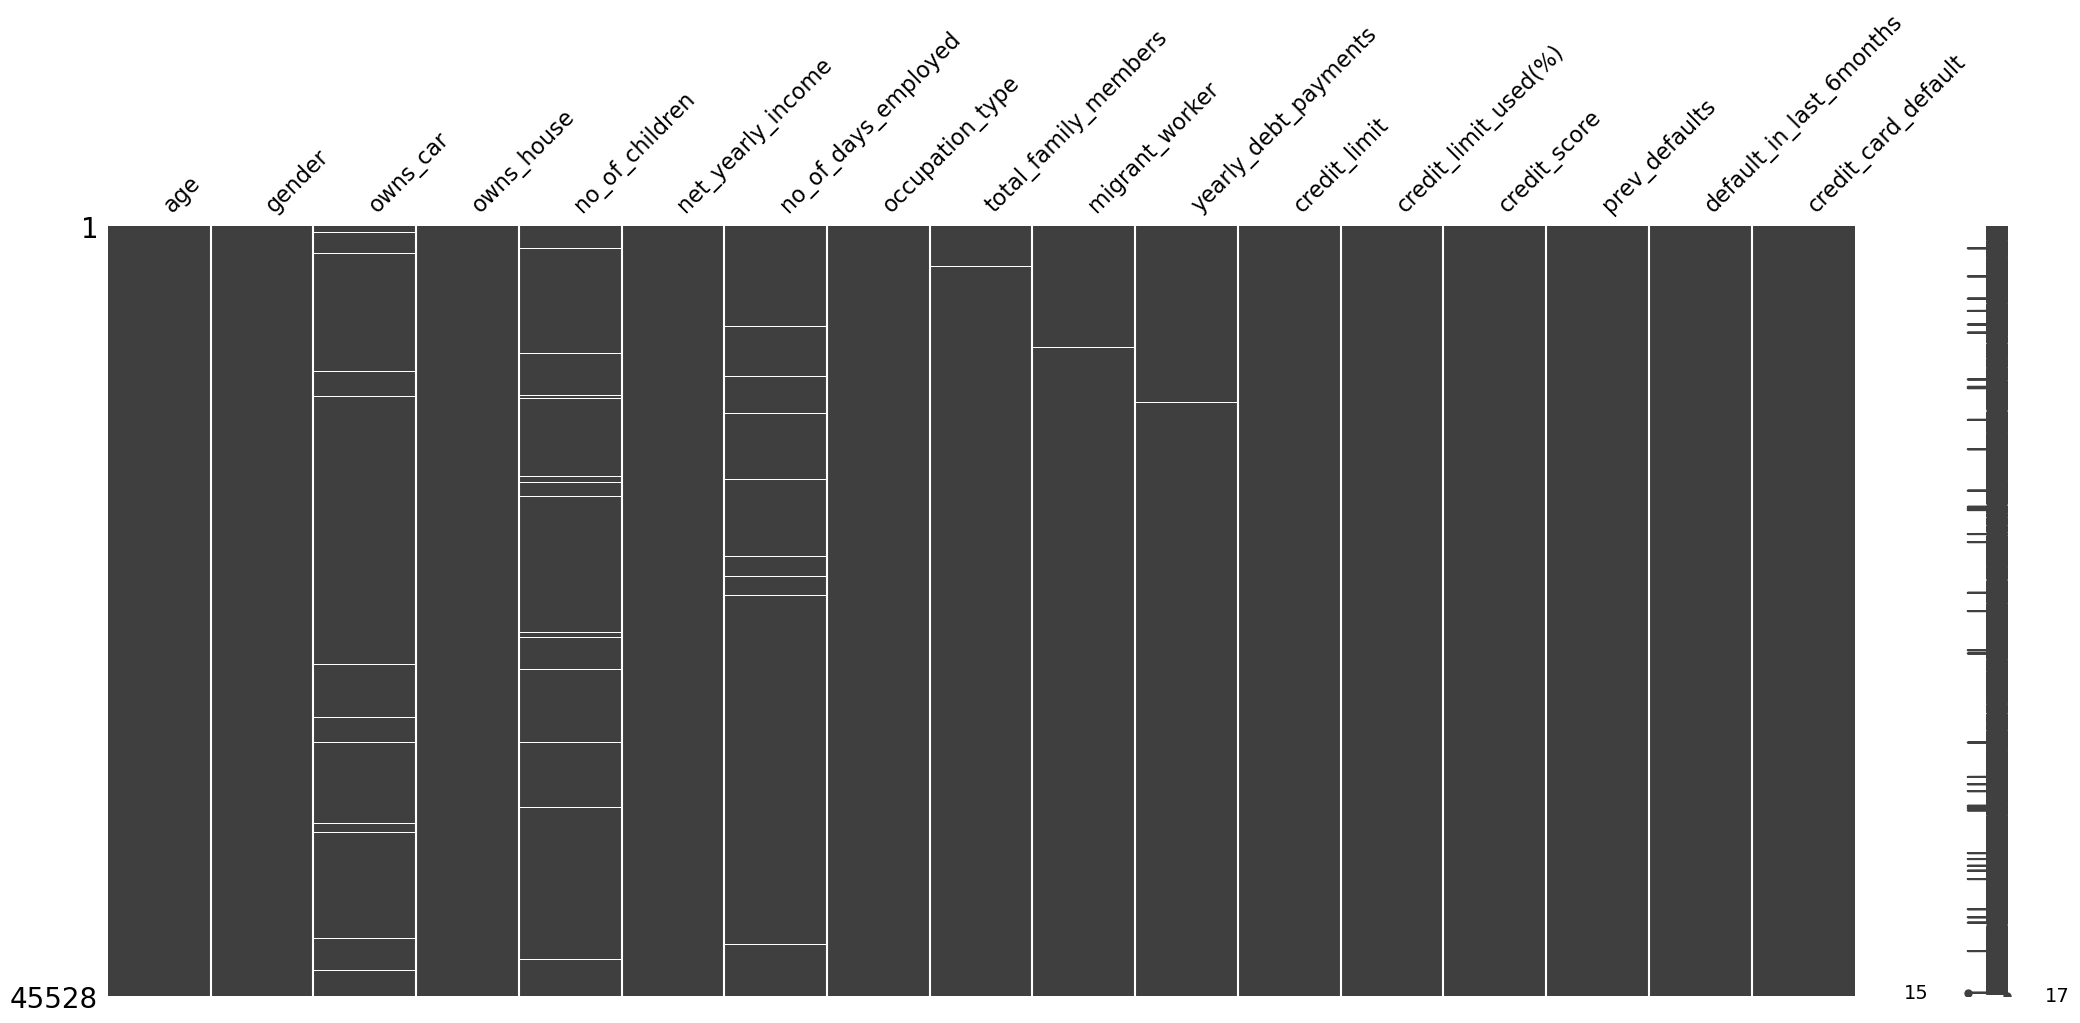

In [19]:
# Missing plot
msno.matrix(a1)

Clearly, the missing values are missing at random, there is no correlation between missing values
What can be done:
1. Simplest way is to remove them
2. Mean/Median/Mode Imputation
3. Advanced techniques for imputation.

Since, only 4% percent of rows have missing values, there is no fun in removing, We would go with simple imputation methods as I think there is not much distortion in distribution of columns.

Also, one of the way is to try both, train models with both missing values and with imputation, and choose accordingly.
 
Let's first dive deep into EDA.

EDA

In [20]:
# Categorical Columns Analysis
cat_cols

['gender',
 'owns_car',
 'owns_house',
 'occupation_type',
 'migrant_worker',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

Which gender group is dominant?

C:\Users\AmanAshu\AppData\Local\Temp\ipykernel_6428\3218387861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=a1, ax=ax[0], palette='Set2')


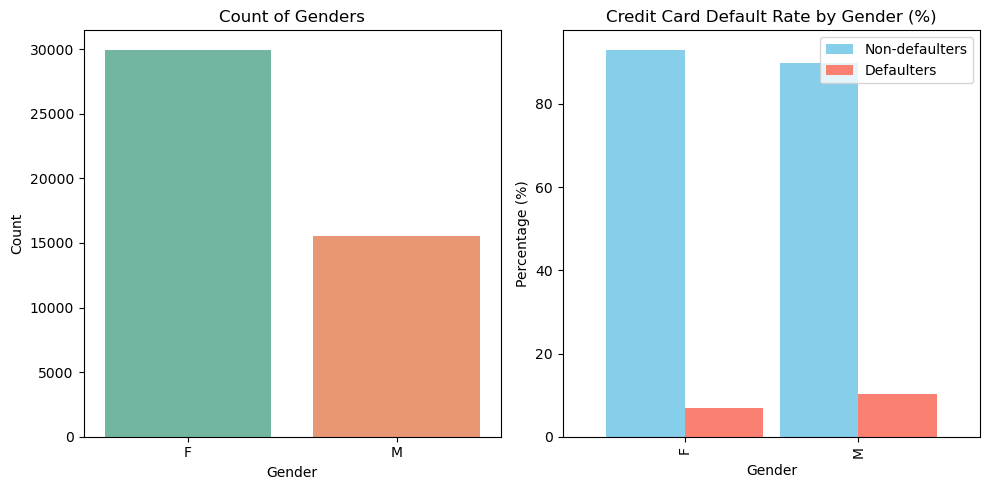

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='gender', data=a1, ax=ax[0], palette='Set2')
ax[0].set_title('Count of Genders')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')


cross_tab = pd.crosstab(a1['gender'], a1['credit_card_default'], normalize='index') * 100
cross_tab.plot(kind='bar', width=0.9, ax=ax[1], color=['skyblue', 'salmon'])

ax[1].set_title('Credit Card Default Rate by Gender (%)')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Percentage (%)')
ax[1].legend(['Non-defaulters', 'Defaulters'])

plt.tight_layout()
plt.show()


C:\Users\AmanAshu\AppData\Local\Temp\ipykernel_6428\2421212220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='owns_car', data=a1, ax=ax[0], palette='Set2')


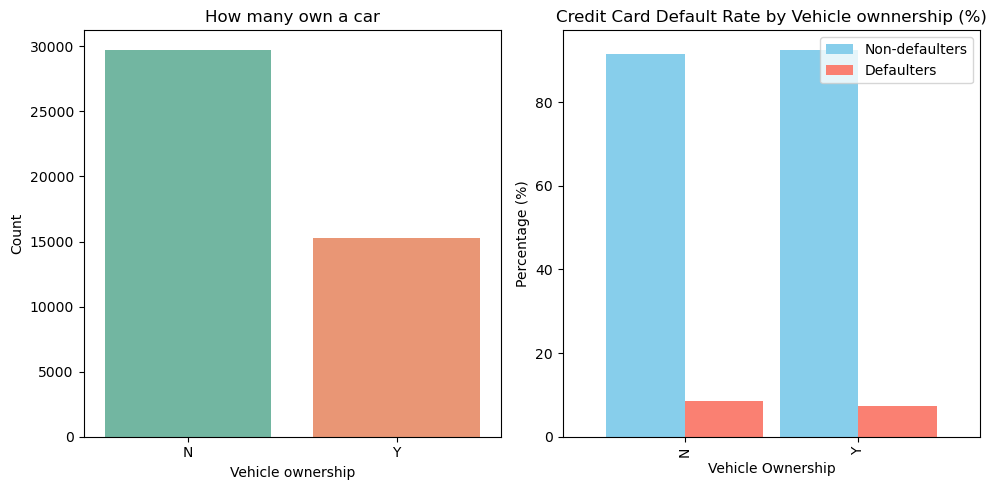

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='owns_car', data=a1, ax=ax[0], palette='Set2')
ax[0].set_title('How many own a car')
ax[0].set_xlabel('Vehicle ownership')
ax[0].set_ylabel('Count')


cross_tab = pd.crosstab(a1['owns_car'], a1['credit_card_default'], normalize='index') * 100
cross_tab.plot(kind='bar', width=0.9, ax=ax[1], color=['skyblue', 'salmon'])

ax[1].set_title('Credit Card Default Rate by Vehicle ownnership (%)')
ax[1].set_xlabel('Vehicle Ownership')
ax[1].set_ylabel('Percentage (%)')
ax[1].legend(['Non-defaulters', 'Defaulters'])

plt.tight_layout()
plt.show()

C:\Users\AmanAshu\AppData\Local\Temp\ipykernel_6428\571877403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='owns_house', data=a1, ax=ax[0], palette='Set2')


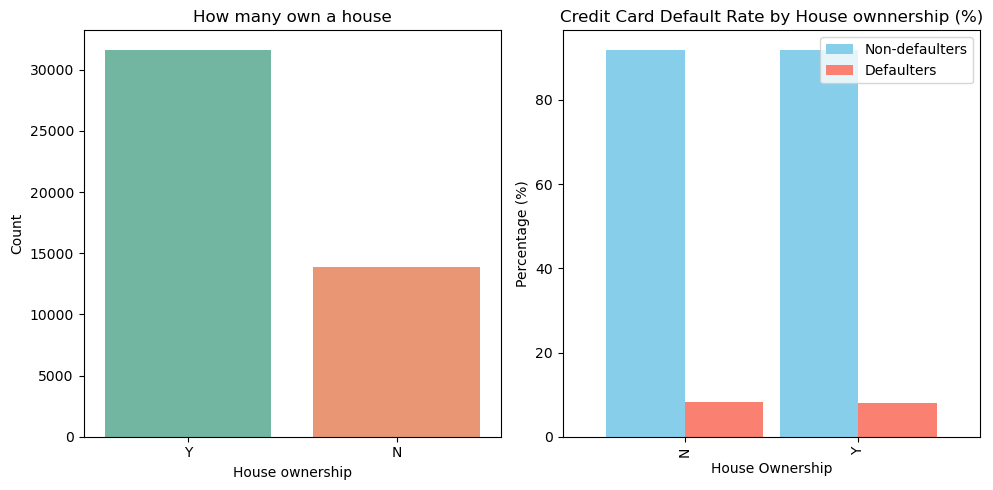

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='owns_house', data=a1, ax=ax[0], palette='Set2')
ax[0].set_title('How many own a house')
ax[0].set_xlabel('House ownership')
ax[0].set_ylabel('Count')


cross_tab = pd.crosstab(a1['owns_house'], a1['credit_card_default'], normalize='index') * 100
cross_tab.plot(kind='bar', width=0.9, ax=ax[1], color=['skyblue', 'salmon'])

ax[1].set_title('Credit Card Default Rate by House ownnership (%)')
ax[1].set_xlabel('House Ownership')
ax[1].set_ylabel('Percentage (%)')
ax[1].legend(['Non-defaulters', 'Defaulters'])

plt.tight_layout()
plt.show()

C:\Users\AmanAshu\AppData\Local\Temp\ipykernel_6428\1400535127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='migrant_worker', data=a1, ax=ax[0], palette='Set2')


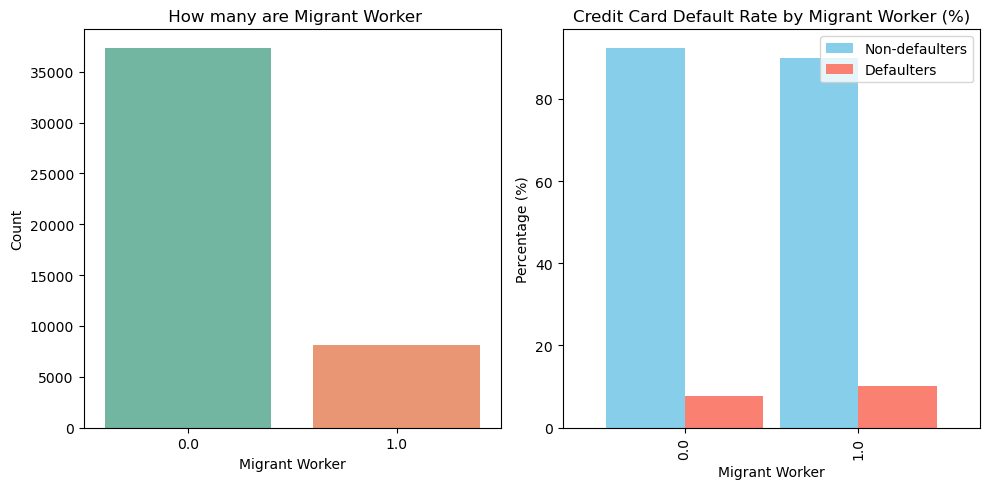

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='migrant_worker', data=a1, ax=ax[0], palette='Set2')
ax[0].set_title(' How many are Migrant Worker')
ax[0].set_xlabel('Migrant Worker')
ax[0].set_ylabel('Count')


cross_tab = pd.crosstab(a1['migrant_worker'], a1['credit_card_default'], normalize='index') * 100
cross_tab.plot(kind='bar', width=0.9, ax=ax[1], color=['skyblue', 'salmon'])

ax[1].set_title('Credit Card Default Rate by Migrant Worker (%)')
ax[1].set_xlabel('Migrant Worker')
ax[1].set_ylabel('Percentage (%)')
ax[1].legend(['Non-defaulters', 'Defaulters'])

plt.tight_layout()
plt.show()

C:\Users\AmanAshu\AppData\Local\Temp\ipykernel_6428\1734403258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='prev_defaults', data=a1, ax=ax[0], palette='Set2')


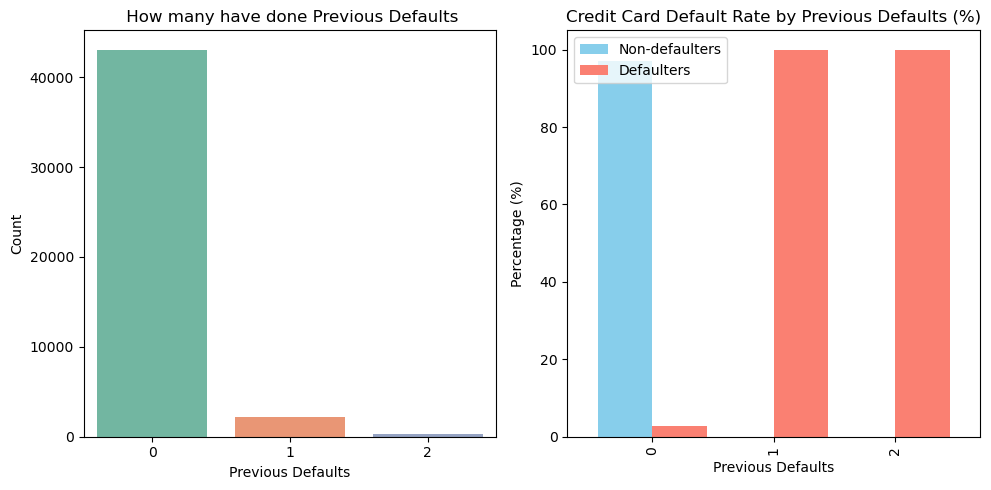

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='prev_defaults', data=a1, ax=ax[0], palette='Set2')
ax[0].set_title(' How many have done Previous Defaults')
ax[0].set_xlabel('Previous Defaults')
ax[0].set_ylabel('Count')


cross_tab = pd.crosstab(a1['prev_defaults'], a1['credit_card_default'], normalize='index') * 100
cross_tab.plot(kind='bar', width=0.9, ax=ax[1], color=['skyblue', 'salmon'])

ax[1].set_title('Credit Card Default Rate by Previous Defaults (%)')
ax[1].set_xlabel('Previous Defaults')
ax[1].set_ylabel('Percentage (%)')
ax[1].legend(['Non-defaulters', 'Defaulters'])

plt.tight_layout()
plt.show()

C:\Users\AmanAshu\AppData\Local\Temp\ipykernel_6428\710041946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default_in_last_6months', data=a1, ax=ax[0], palette='Set2')


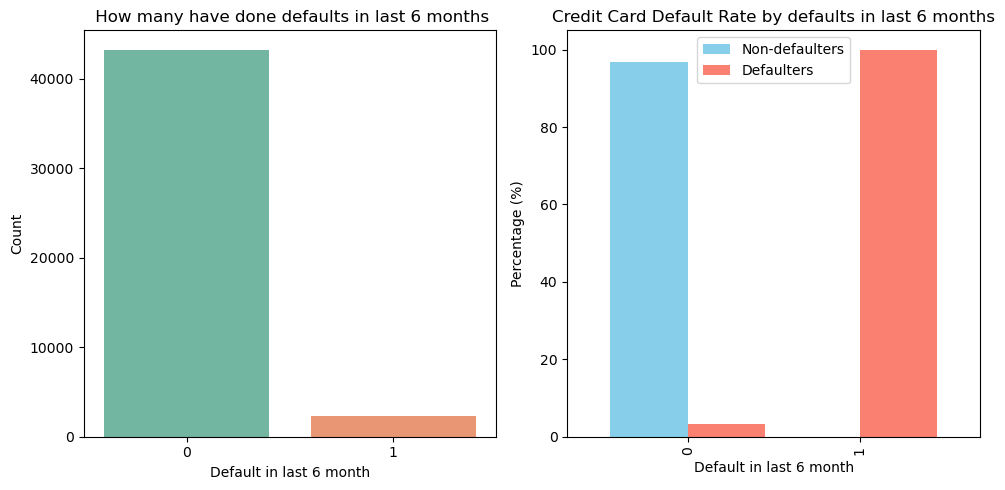

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='default_in_last_6months', data=a1, ax=ax[0], palette='Set2')
ax[0].set_title(' How many have done defaults in last 6 months')
ax[0].set_xlabel('Default in last 6 month')
ax[0].set_ylabel('Count')


cross_tab = pd.crosstab(a1['default_in_last_6months'], a1['credit_card_default'], normalize='index') * 100
cross_tab.plot(kind='bar', width=0.9, ax=ax[1], color=['skyblue', 'salmon'])

ax[1].set_title('Credit Card Default Rate by defaults in last 6 months')
ax[1].set_xlabel('Default in last 6 month')
ax[1].set_ylabel('Percentage (%)')
ax[1].legend(['Non-defaulters', 'Defaulters'])

plt.tight_layout()
plt.show()

Numerical Column Analysis

In [27]:
num_cols

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score']

Text(0.5, 1.0, 'Credit Card Default in Age group')

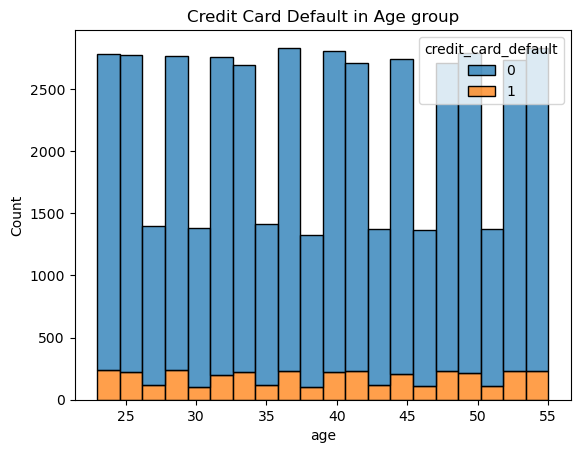

In [28]:
sns.histplot(x = 'age', data = a1,bins=20, hue = 'credit_card_default', multiple = 'stack').set_title('Credit Card Default in Age group')

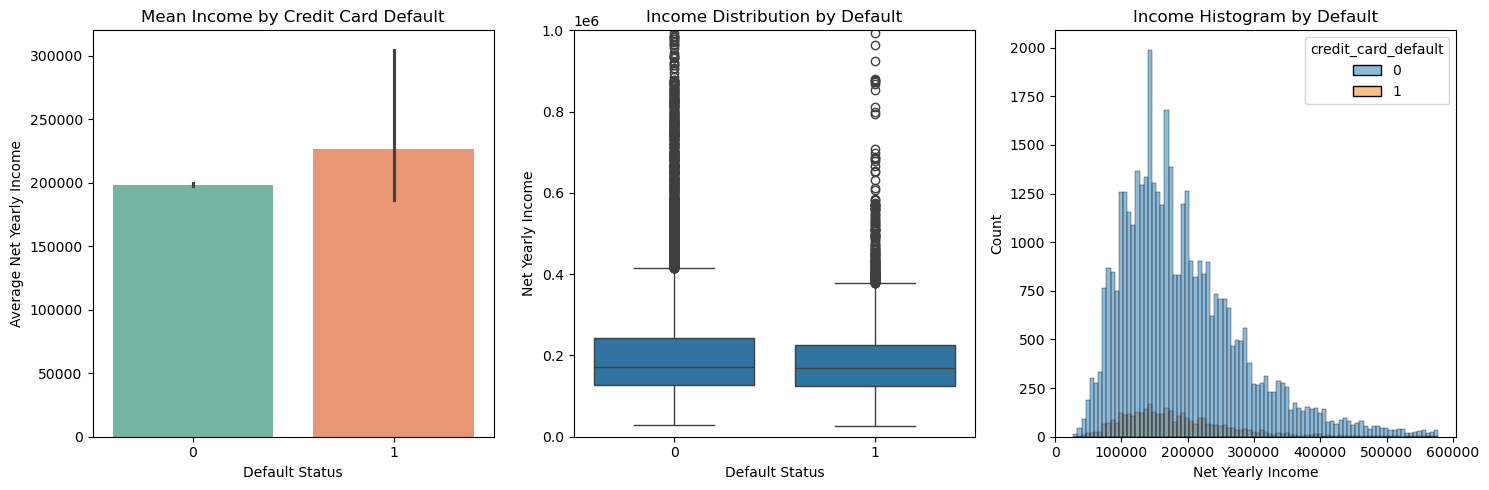

In [ ]:


fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

sns.barplot(data=a1, x='credit_card_default', y='net_yearly_income', 
            hue='credit_card_default', palette='Set2', ax=axes[0], legend=False)

axes[0].set_title('Mean Income by Credit Card Default')
axes[0].set_xlabel('Default Status')
axes[0].set_ylabel('Average Net Yearly Income')

sns.boxplot(data=a1, x='credit_card_default', y='net_yearly_income', ax=axes[1])
axes[1].set_title('Income Distribution by Default')
axes[1].set_xlabel('Default Status')
axes[1].set_ylabel('Net Yearly Income')
axes[1].set_ylim(0, 1e6)  


filtered = a1[a1['net_yearly_income'] < a1['net_yearly_income'].quantile(0.99)]
sns.histplot(data=filtered, x='net_yearly_income', hue='credit_card_default', ax=axes[2])
axes[2].set_title('Income Histogram by Default')
axes[2].set_xlabel('Net Yearly Income')

plt.tight_layout()
plt.show()


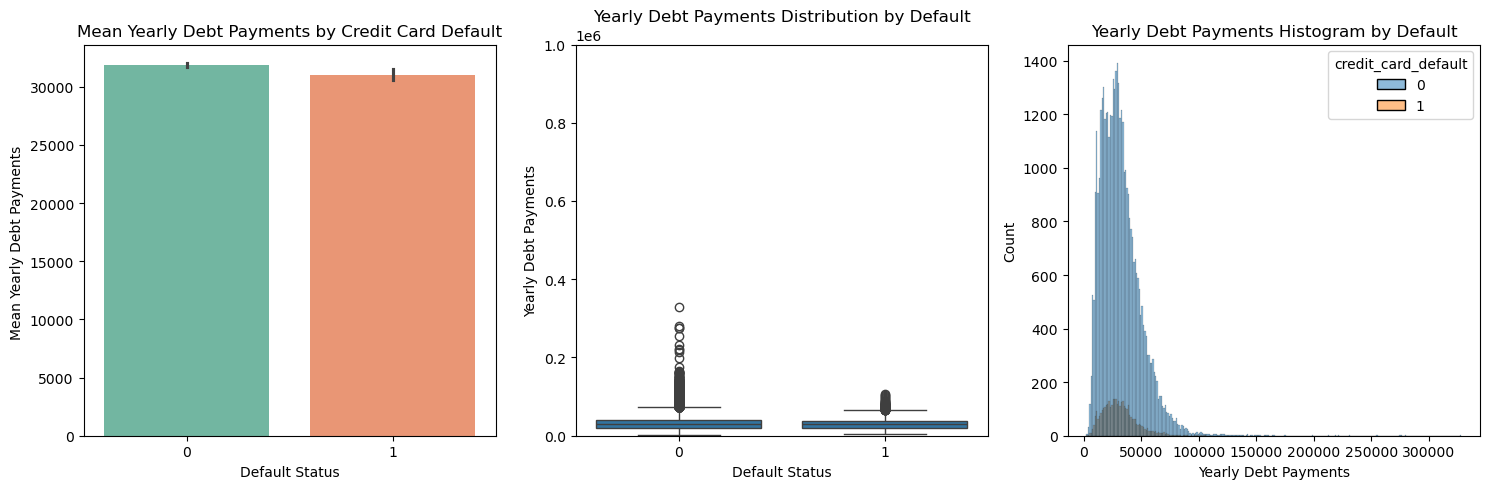

In [34]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

sns.barplot(data=a1, x='credit_card_default', y='yearly_debt_payments', 
            hue='credit_card_default', palette='Set2', ax=axes[0], legend=False)

axes[0].set_title('Mean Yearly Debt Payments by Credit Card Default')
axes[0].set_xlabel('Default Status')
axes[0].set_ylabel('Mean Yearly Debt Payments ')

sns.boxplot(data=a1, x='credit_card_default', y='yearly_debt_payments', ax=axes[1])
axes[1].set_title('Yearly Debt Payments Distribution by Default')
axes[1].set_xlabel('Default Status')
axes[1].set_ylabel('Yearly Debt Payments')
axes[1].set_ylim(0, 1e6)  



sns.histplot(data=a1, x='yearly_debt_payments', hue='credit_card_default', ax=axes[2])
axes[2].set_title('Yearly Debt Payments Histogram by Default')
axes[2].set_xlabel('Yearly Debt Payments')

plt.tight_layout()
plt.show()


In [33]:
num_cols

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score']

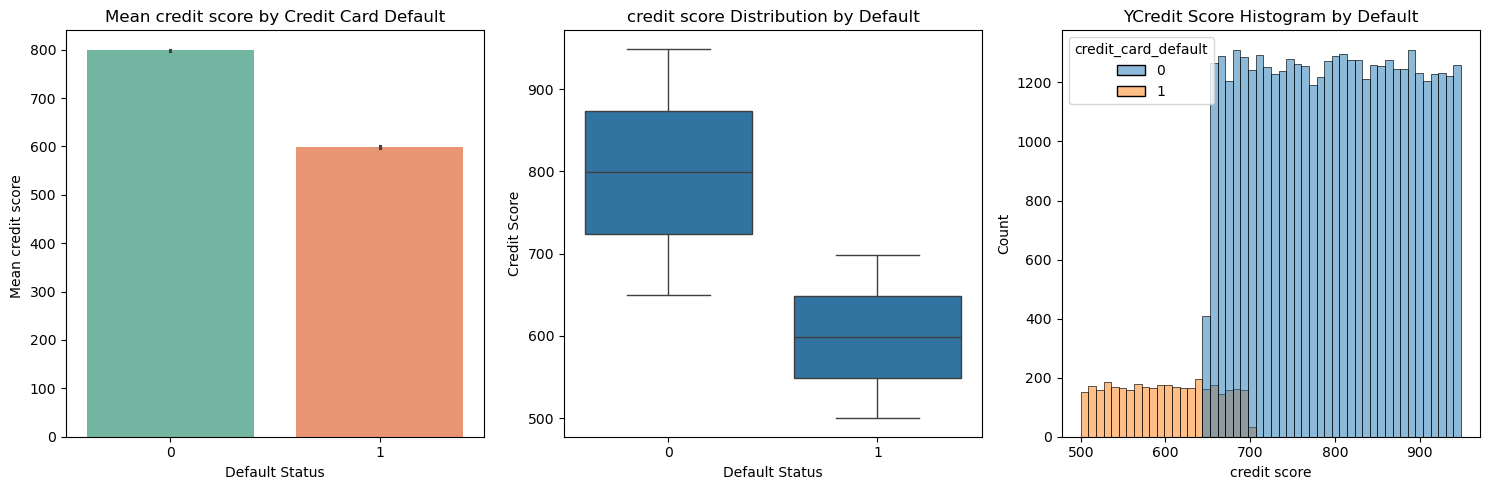

In [36]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

sns.barplot(data=a1, x='credit_card_default', y='credit_score', 
            hue='credit_card_default', palette='Set2', ax=axes[0], legend=False)

axes[0].set_title('Mean credit score by Credit Card Default')
axes[0].set_xlabel('Default Status')
axes[0].set_ylabel('Mean credit score ')

sns.boxplot(data=a1, x='credit_card_default', y='credit_score', ax=axes[1])
axes[1].set_title('credit score Distribution by Default')
axes[1].set_xlabel('Default Status')
axes[1].set_ylabel('Credit Score')




sns.histplot(data=a1, x='credit_score', hue='credit_card_default', ax=axes[2])
axes[2].set_title('YCredit Score Histogram by Default')
axes[2].set_xlabel('credit score')

plt.tight_layout()
plt.show()

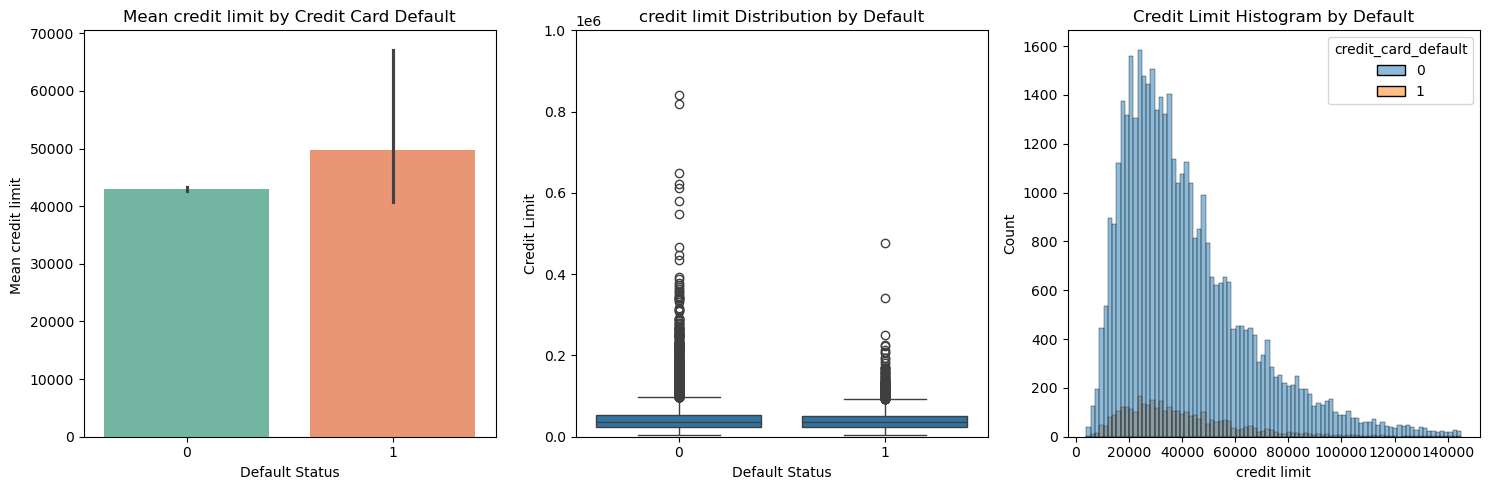

In [39]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

sns.barplot(data=a1, x='credit_card_default', y='credit_limit', 
            hue='credit_card_default', palette='Set2', ax=axes[0], legend=False)

axes[0].set_title('Mean credit limit by Credit Card Default')
axes[0].set_xlabel('Default Status')
axes[0].set_ylabel('Mean credit limit ')

sns.boxplot(data=a1, x='credit_card_default', y='credit_limit', ax=axes[1])
axes[1].set_title('credit limit Distribution by Default')
axes[1].set_xlabel('Default Status')
axes[1].set_ylabel('Credit Limit')
axes[1].set_ylim(0,1e6)



filtered1 = a1[a1['credit_limit'] < a1['credit_limit'].quantile(0.99)]
sns.histplot(data=filtered1, x='credit_limit', hue='credit_card_default', ax=axes[2])
axes[2].set_title('Credit Limit Histogram by Default')
axes[2].set_xlabel('credit limit')

plt.tight_layout()
plt.show()

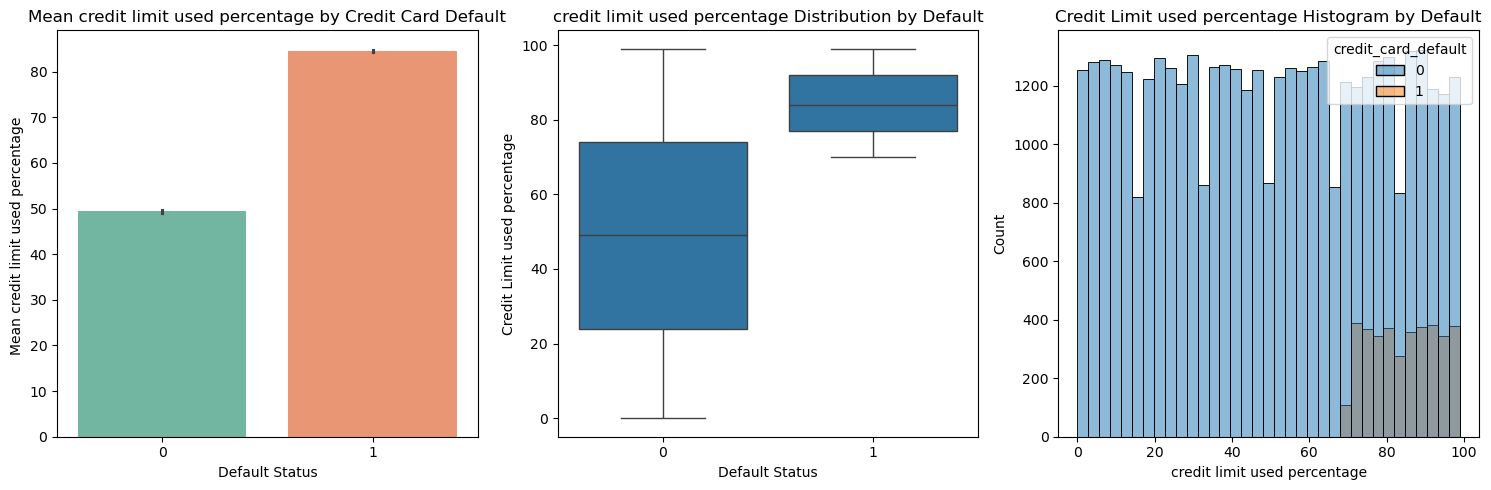

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

sns.barplot(data=a1, x='credit_card_default', y='credit_limit_used(%)', 
            hue='credit_card_default', palette='Set2', ax=axes[0], legend=False)

axes[0].set_title('Mean credit limit used percentage by Credit Card Default')
axes[0].set_xlabel('Default Status')
axes[0].set_ylabel('Mean credit limit used percentage ')

sns.boxplot(data=a1, x='credit_card_default', y='credit_limit_used(%)', ax=axes[1])
axes[1].set_title('credit limit used percentage Distribution by Default')
axes[1].set_xlabel('Default Status')
axes[1].set_ylabel('Credit Limit used percentage')




sns.histplot(data=a1, x='credit_limit_used(%)', hue='credit_card_default', ax=axes[2])
axes[2].set_title('Credit Limit used percentage Histogram by Default')
axes[2].set_xlabel('credit limit used percentage')

plt.tight_layout()
plt.show()